### 라이브러리 임포트

In [106]:
from PIL import ImageFont, ImageDraw, Image
import cv2              # OpenCV로 이미지 정제
import pytesseract      # OCR을 할 메인 엔진
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 텍스트 추출

In [142]:
path = r'C:\ITStudy\100_SelfProject\2nd_TechSeminar\Data\tesseract_test3.png'
image = Image.open(path)
text = pytesseract.image_to_string(image, lang='kor+eng')

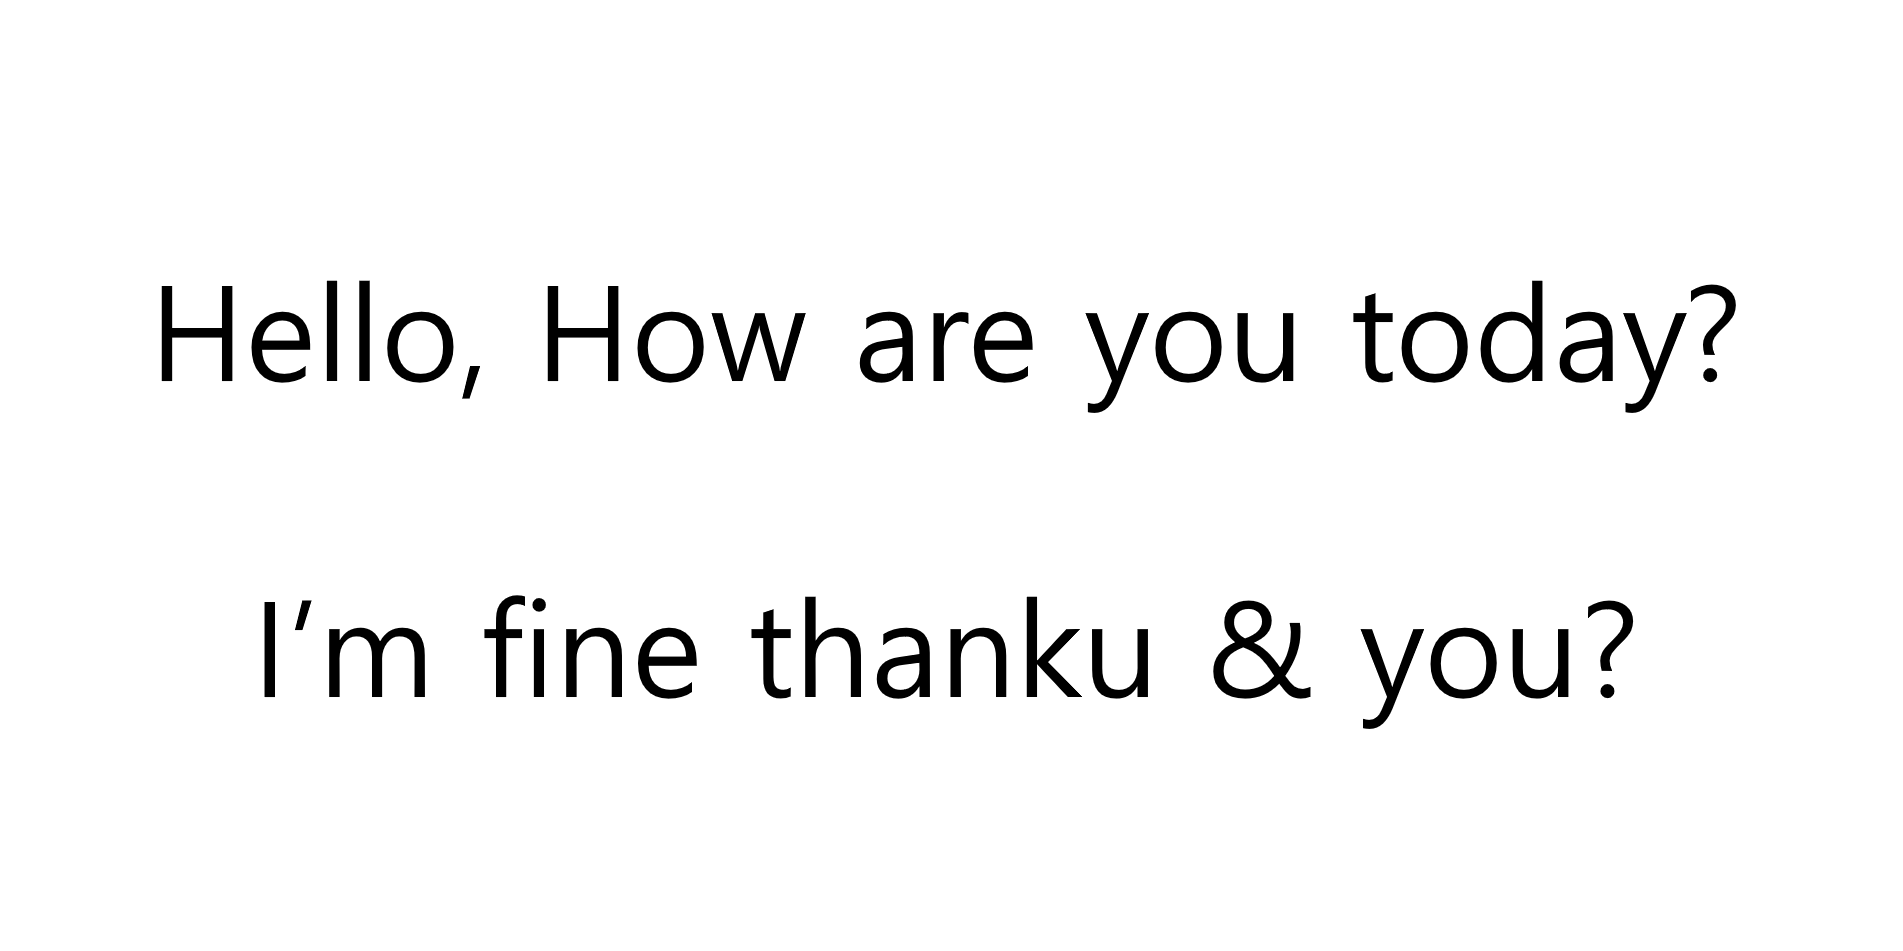

In [143]:
image

In [144]:
print(text)

Hello, How are you today?

I'm fine thanku & you?



### 이미지 시각화

In [145]:
def tesseract_ocr_extract(image_path):
    
    image = cv2.imread(image_path)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = pytesseract.image_to_data(rgb, output_type=pytesseract.Output.DICT)

    return_list = [{
            "left": results["left"][i],
            "top": results["top"][i],
            "width": results["width"][i],
            "height": results["height"][i],
            "text": results["text"][i],
            "confidence": int(results["conf"][i])
            } for i in range(len(results["text"]))]
    
    return return_list

In [146]:
box_list = tesseract_ocr_extract(path)

In [147]:
# 테서렉트가 분석하면서 회차별로 정보를 저장한 box_list
box_list

[{'left': 0,
  'top': 0,
  'width': 1903,
  'height': 951,
  'text': '',
  'confidence': -1},
 {'left': 162,
  'top': 281,
  'width': 1574,
  'height': 132,
  'text': '',
  'confidence': -1},
 {'left': 162,
  'top': 281,
  'width': 1574,
  'height': 132,
  'text': '',
  'confidence': -1},
 {'left': 162,
  'top': 281,
  'width': 1574,
  'height': 132,
  'text': '',
  'confidence': -1},
 {'left': 162,
  'top': 281,
  'width': 318,
  'height': 118,
  'text': 'Hello,',
  'confidence': 95},
 {'left': 548,
  'top': 286,
  'width': 258,
  'height': 97,
  'text': 'How',
  'confidence': 95},
 {'left': 860,
  'top': 312,
  'width': 173,
  'height': 71,
  'text': 'are',
  'confidence': 96},
 {'left': 1086,
  'top': 312,
  'width': 207,
  'height': 101,
  'text': 'you',
  'confidence': 96},
 {'left': 1353,
  'top': 281,
  'width': 383,
  'height': 132,
  'text': 'today?',
  'confidence': 90},
 {'left': 265,
  'top': 595,
  'width': 1368,
  'height': 134,
  'text': '',
  'confidence': -1},
 {'left'

In [148]:
df = pd.DataFrame(box_list)
print(df)

    left  top  width  height    text  confidence
0      0    0   1903     951                  -1
1    162  281   1574     132                  -1
2    162  281   1574     132                  -1
3    162  281   1574     132                  -1
4    162  281    318     118  Hello,          95
5    548  286    258      97     How          95
6    860  312    173      71     are          96
7   1086  312    207     101     you          96
8   1353  281    383     132  today?          90
9    265  595   1368     134                  -1
10   265  595   1368     134                  -1
11   265  595   1368     134                  -1
12   265  600    160      97     I'm          87
13   484  595    213     104    fine          91
14   751  597    397     102  thanku          91
15  1213  601     98      98       &          91
16  1361  601    272     128    you?          96


In [149]:
try:
    font = ImageFont.truetype("malgun.ttf", 15)
except IOError:
    font = ImageFont.load_default() # 폰트 파일이 없을 경우 기본 폰트 사용

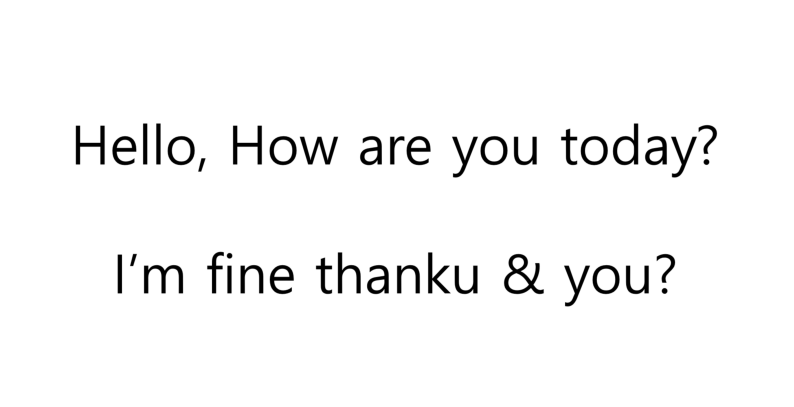

In [150]:
total_image = image.copy()
draw = ImageDraw.Draw(total_image)

# 인식된 텍스트와 바운딩 박스를 이미지에 그리기
for bbox in box_list:
    if bbox['text'] == '':
        continue

    top_left = tuple((bbox['left'], bbox['top']))
    bottom_right = tuple((bbox['left']+bbox['width'], bbox['top']+bbox['height']))

    # 바운딩 박스 그리기
    draw.rectangle((top_left, bottom_right), outline="blue", width=2)

    # # 텍스트 그리기 (박스 위에 위치)
    # text_position = (top_left[0], top_left[1] - 20)
    # draw.text(text_position, text, font=font, fill="black")

# 결과 이미지 출력
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.axis('off')  # 축 눈금 숨기기
plt.show()

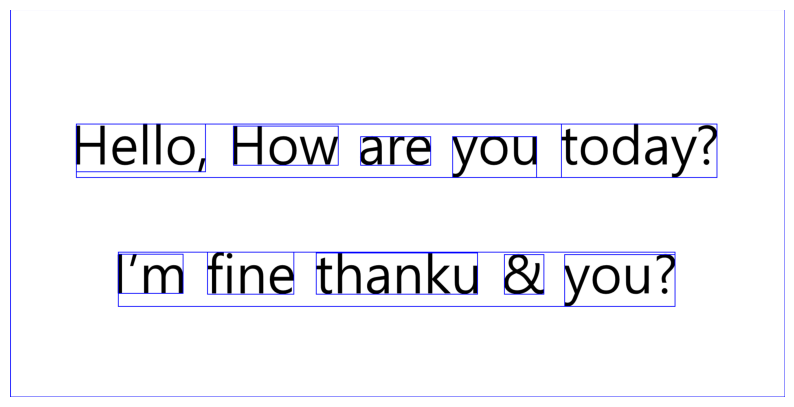

In [140]:
# 1. 그리기 도구 준비
draw = ImageDraw.Draw(image)

bbox = box_list[0]

top_left = tuple((bbox['left'], bbox['top']))
bottom_right = tuple((bbox['left']+bbox['width'], bbox['top']+bbox['height']))
draw.rectangle((top_left, bottom_right), outline="blue", width=2)

plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.axis('off')  # 축 눈금 숨기기
plt.show()


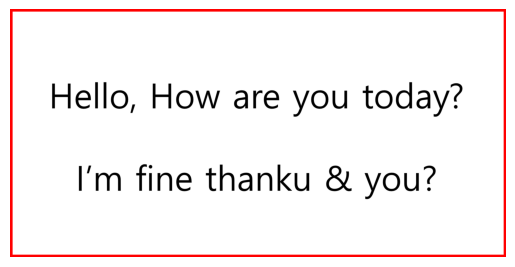

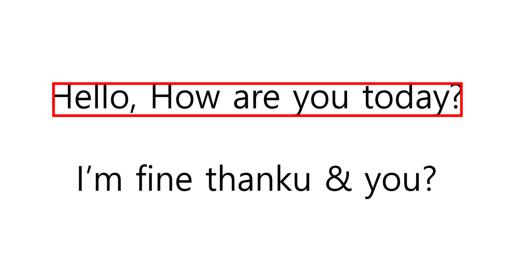

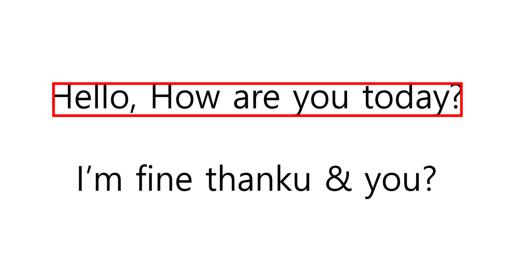

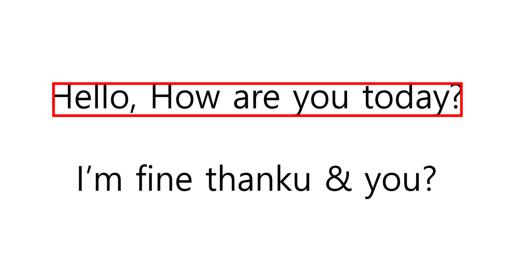

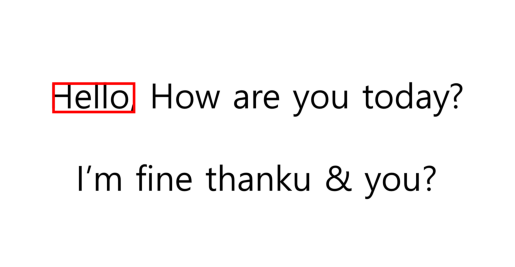

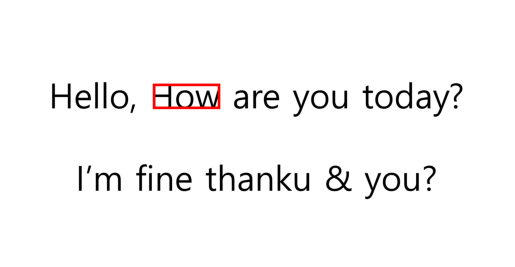

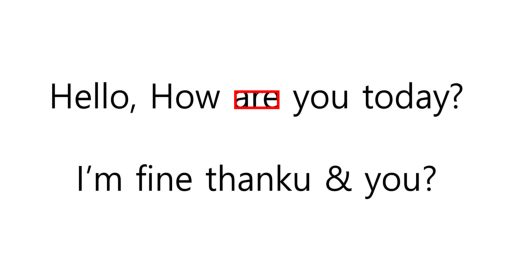

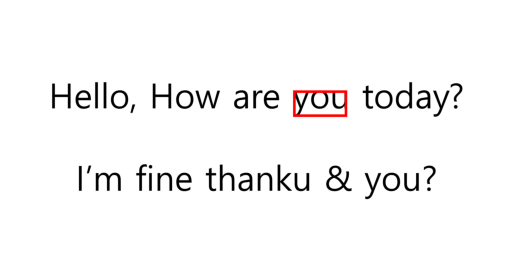

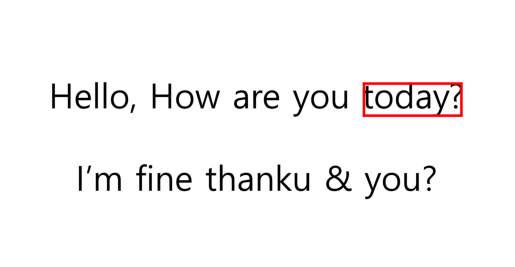

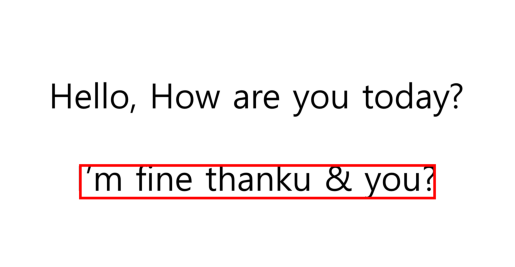

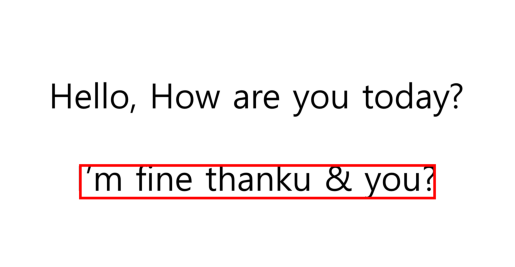

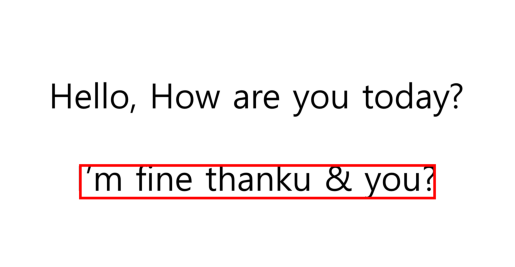

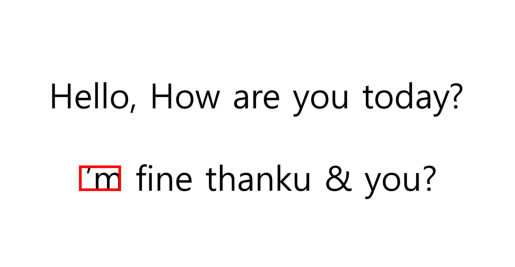

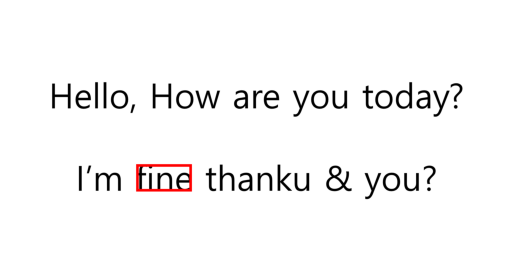

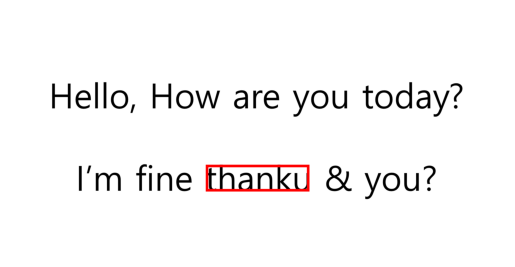

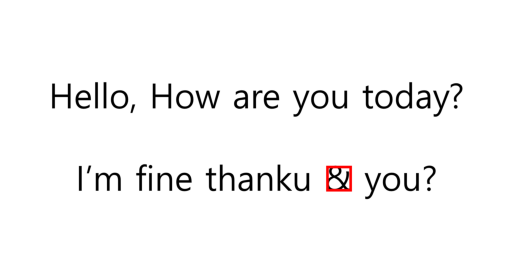

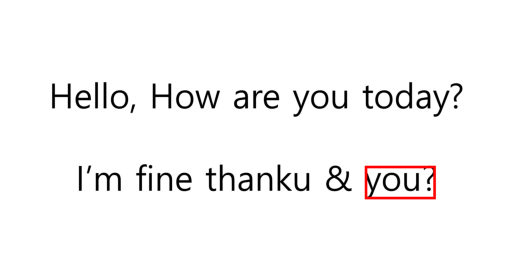

In [ ]:
for i, bbox in enumerate(box_list):
    image_to_draw = image.copy()
    draw = ImageDraw.Draw(image_to_draw)

    top_left = (bbox['left'], bbox['top'])
    bottom_right = (bbox['left'] + bbox['width'], bbox['top'] + bbox['height'])
    draw.rectangle((top_left, bottom_right), outline="red", width=10)

    plt.imshow(image_to_draw)
    plt.axis('off')
    plt.show()

### 출처
파이테서렉트 공식문서: https://pypi.org/project/pytesseract/  
동작 원리 -> EasyOCR 까지: https://velog.io/@xpelqpdj0422/11.-OCR-%EA%B8%B0%EC%88%A0%EC%9D%98-%EA%B0%9C%EC%9A%94

